<a href="https://colab.research.google.com/github/Bruceirshaidat/cifar10/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [48]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [49]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [50]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

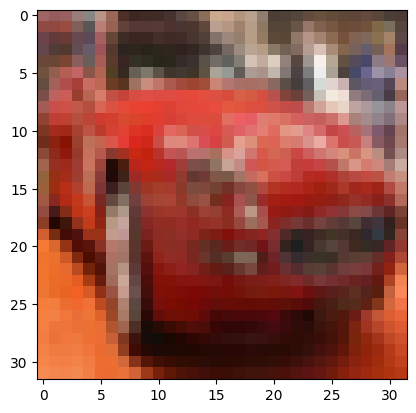

In [51]:
plt.imshow(X_train[5])

In [52]:
X_train = X_train/255.0
X_test = X_test/255.0

##CNN classification

In [88]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = models.Sequential()

# ===== Block 1 =====
model.add(layers.Conv2D(32, KERNEL_SIZE, activation='relu',
                        padding='same', input_shape=INPUT_SHAPE))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, KERNEL_SIZE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# ===== Block 2 =====
model.add(layers.Conv2D(64, KERNEL_SIZE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, KERNEL_SIZE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# ===== Block 3 =====
model.add(layers.Conv2D(128, KERNEL_SIZE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, KERNEL_SIZE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# ===== Classifier =====
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.2575 - loss: 2.0630
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4794 - loss: 1.4221
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5938 - loss: 1.1514
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6609 - loss: 0.9848
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6946 - loss: 0.9024
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7262 - loss: 0.8096
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7491 - loss: 0.7516
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7753 - loss: 0.6631
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7873 - loss: 0.6366
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7959 - loss: 0.5989
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8120 - loss: 0.5596
Epoch 12/20
1563/1563 ━━━━━━━

In [91]:
test_loss,test_accurcy=model.evaluate(X_test,y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accurcy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8387 - loss: 0.5184
Test loss: 0.5142643451690674
Test accuracy: 83.74%


In [92]:
y_pred = model.predict(X_test)
y_pred[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[1.61880632e-06, 2.18724949e-08, 5.94028170e-05, 9.90318537e-01,
        3.56346354e-05, 9.41889640e-03, 1.56454087e-04, 8.27493659e-06,
        1.71457216e-07, 1.04258072e-06],
       [1.23035839e-08, 6.08723525e-08, 9.35240756e-15, 5.69606430e-17,
        2.91921620e-16, 4.64774401e-20, 1.06444208e-14, 4.40351659e-21,
        9.99999881e-01, 2.70520772e-10],
       [1.01233170e-04, 2.71447061e-04, 1.57139453e-07, 1.45430121e-08,
        8.15778112e-09, 1.03348594e-10, 2.74425211e-08, 2.29876430e-11,
        9.99609828e-01, 1.73114386e-05]], dtype=float32)

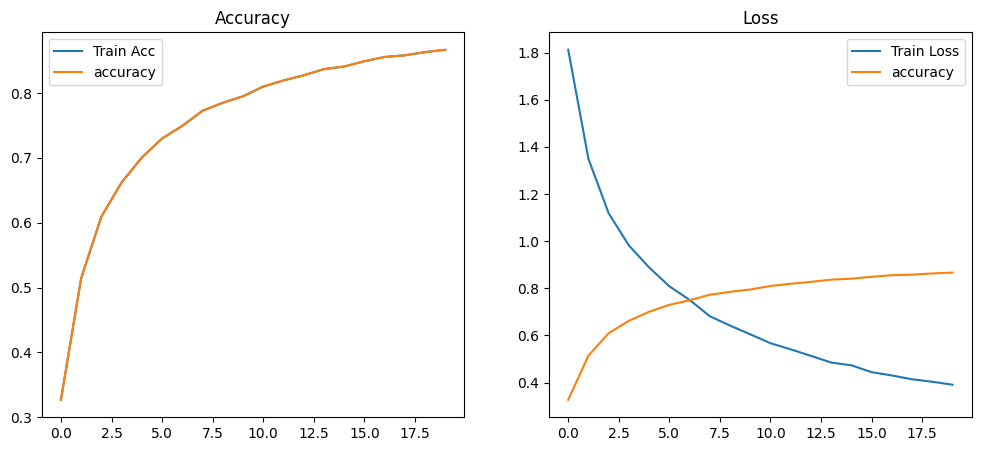

In [93]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.title('Loss')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


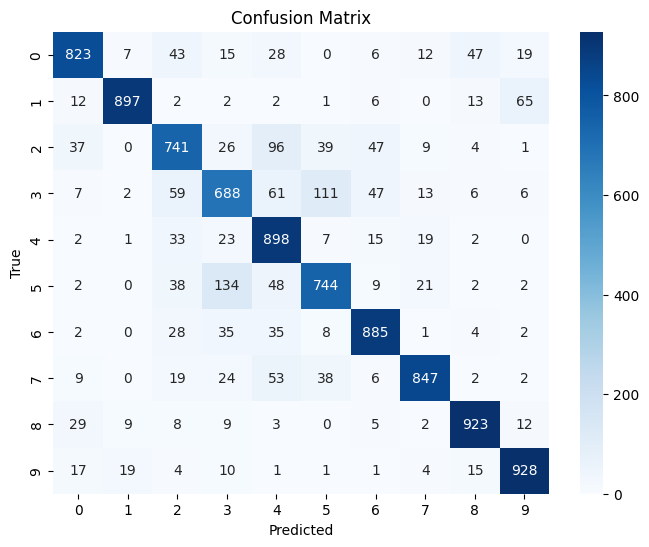

In [94]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1000
           1       0.96      0.90      0.93      1000
           2       0.76      0.74      0.75      1000
           3       0.71      0.69      0.70      1000
           4       0.73      0.90      0.81      1000
           5       0.78      0.74      0.76      1000
           6       0.86      0.89      0.87      1000
           7       0.91      0.85      0.88      1000
           8       0.91      0.92      0.91      1000
           9       0.89      0.93      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [85]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:3]

[np.int64(0), np.int64(0), np.int64(0)]

In [86]:
def plot_sample(X, y, index):
    plt.imshow(X[index])
    plt.title(f'Label: {y[index][0]}')
    #plt.axis('off')
    plt.show()

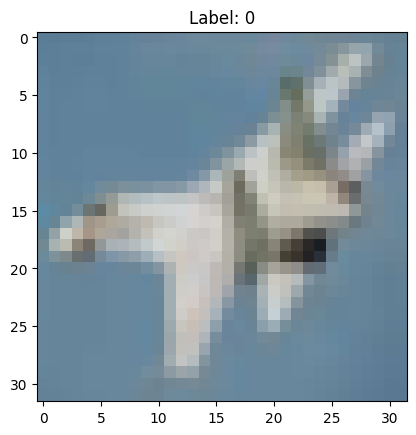

In [87]:
plot_sample(X_test, y_test, 10)